<a href="https://colab.research.google.com/github/ArchanGhosh/Neural-Network-Examples-and-Practices/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras 

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
X_train_full.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

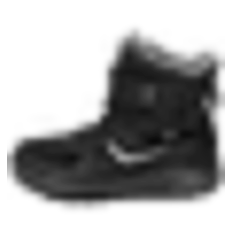

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap=plt.cm.binary, interpolation='gaussian')
plt.axis('off')

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [0]:
X_train_scaled, X_test_scaled =X_train_full / 255.0, X_test/255.0 

In [0]:
model.compile(optimizer='sgd', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [0]:
history=model.fit(X_train_scaled, y_train_full, validation_split=0.2, epochs=30)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 7s 146us/sample - loss: 0.7310 - accuracy: 0.7595 - val_loss: 0.5621 - val_accuracy: 0.8037
Epoch 2/30
48000/48000 [==============================] - 6s 131us/sample - loss: 0.4970 - accuracy: 0.8268 - val_loss: 0.4690 - val_accuracy: 0.8380
Epoch 3/30
48000/48000 [==============================] - 6s 126us/sample - loss: 0.4488 - accuracy: 0.8431 - val_loss: 0.4355 - val_accuracy: 0.8462
Epoch 4/30
48000/48000 [==============================] - 6s 124us/sample - loss: 0.4219 - accuracy: 0.8511 - val_loss: 0.4182 - val_accuracy: 0.8557
Epoch 5/30
48000/48000 [==============================] - 6s 121us/sample - loss: 0.4034 - accuracy: 0.8578 - val_loss: 0.4226 - val_accuracy: 0.8488
Epoch 6/30
48000/48000 [==============================] - 6s 120us/sample - loss: 0.3869 - accuracy: 0.8643 - val_loss: 0.3943 - val_accuracy: 0.8623
Epoch 7/30
48000/48000 [==========================

In [0]:
history_df=pd.DataFrame(history.history)

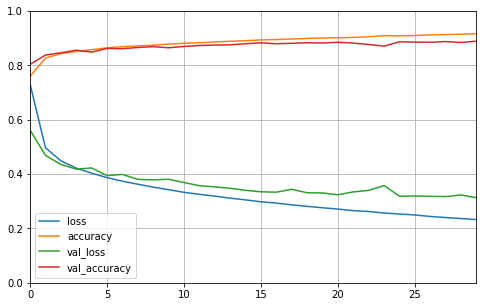

In [0]:
history_df.plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test_scaled, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3358 - accuracy: 0.8811


[0.3358323482275009, 0.8811]

In [0]:
model.predict(X_test_scaled[:10])

array([[7.33886623e-07, 7.81836889e-07, 3.17077756e-05, 7.27750330e-06,
        4.19347907e-06, 1.09734181e-02, 1.03311631e-05, 5.59437228e-03,
        4.05255007e-04, 9.82971966e-01],
       [1.38452342e-05, 1.94405891e-09, 9.95067477e-01, 9.39258413e-08,
        4.26437659e-03, 9.04741976e-11, 6.53227442e-04, 2.13043166e-10,
        9.64408173e-07, 1.47936058e-12],
       [1.40619295e-05, 9.99984264e-01, 6.12122975e-08, 1.45365209e-06,
        9.24009314e-08, 5.03166259e-12, 6.10292759e-08, 1.33179590e-09,
        2.61942983e-08, 1.12317577e-09],
       [1.96391702e-05, 9.99941349e-01, 7.53777329e-07, 3.54387412e-05,
        8.54736470e-07, 3.25619198e-10, 1.87015746e-06, 1.48498271e-08,
        2.83373520e-08, 4.55383855e-08],
       [7.61053562e-02, 4.42277496e-06, 8.25231522e-03, 3.06024362e-04,
        2.11692974e-03, 2.96426151e-07, 9.13026512e-01, 1.23167254e-07,
        1.86797435e-04, 1.29713021e-06],
       [3.38302722e-04, 9.99627709e-01, 4.94071355e-06, 1.29297468e-05,
   

In [0]:
model.predict_classes(X_test_scaled[:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])